# TP Euler 2 : corrigé

In [7]:
import matplotlib.pyplot as plt

# Système de Lotka-Voltera

1. Soit $h$ un pas (par exemple $h = 0.01$. Voici les relations obtenues en appliquant la méthode d'Euler sur chaque équation différentielle : 
$$x_{k + 1} = x_k + h\times x_k(\alpha - \beta y_k)$$
$$y_{k + 1} = y_k + h\times y_k(\delta x_k - \gamma)$$

In [18]:
# 2. On choisit d'utiliser une fonction même si ce n'est pas obligatoire
def lotka(h, n, a, b, c, d):
    x, y = [1], [2]
    for k in range(n-1):
        x.append(x[k] + h*x[k]*(a - b*y[k]))
        y.append(y[k] + h*y[k]*(d*x[k] - c))
    return x, y

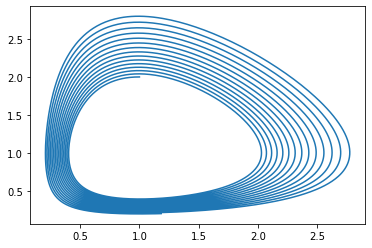

In [19]:
# 3. 
x, y = lotka(0.01, 10000, 1, 1, 1, 1)
plt.plot(x, y);

On observe un comportement presque cyclique :
- Quand le nombre de prédateurs devient trop important, les proies diminuent
- Quand les proies deviennent trop peu nombreuses, les prédateurs diminuent (ils n'ont plus à manger)
- Quand il y a peu de prédateurs, les proies peuvent augmenter
- Quand il y a beaucoup de proies, les prédateurs augmentent
- ...

Si on augmente la précision de la méthode (en diminuant $h$) on voit que la vraie solution est parfaitement cyclique :

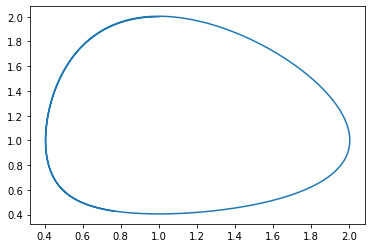

In [20]:
x, y = lotka(0.001, 10000, 1, 1, 1, 1)
plt.plot(x, y);

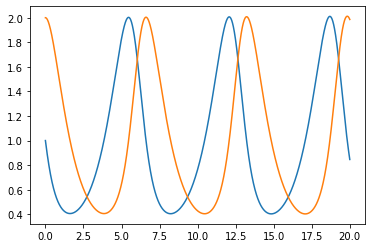

In [24]:
# 4.
h, n = 0.001, 20000
t = [h*k for k in range(n)]
x, y = lotka(h, n, 1, 1, 1, 1)
plt.plot(t, x)
plt.plot(t, y);

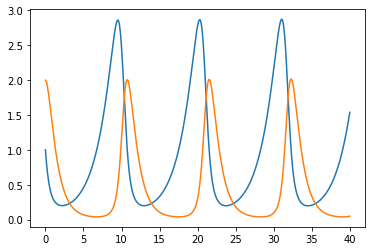

In [35]:
# 5.
h, n = 0.001, 40000
t = [h*k for k in range(n)]
x, y = lotka(h, n, .5, 1, 1, 1) # avec moins de proies
plt.plot(t, x)
plt.plot(t, y);

## Équation d'ordre 2

On poser $z = y'$. L'équation $y''(t) = -\alpha y'(t) - \sin(y(t))$ devient alors $z'(t) = -\alpha z(t) - \sin(y(t))$.  
On a donc le système suivant, à 2 équations différentielles et 2 inconnues :
$$y'(t) = z(t)$$
$$z'(t) = -\alpha z(t) - \sin(y(t))$$
On résout ce système de la même façon que dans le 1er exercice : en posant des temps d'approximations $t_k$ séparés de $h$ et en approximant $z_k \approx z(t_k)$ et $y_k \approx y(t_k)$. Voici les équations de la méthode d'Euler :
$$y_{k + 1} = y_k + hz_k$$
$$z_{k + 1} = z_k + h(-\alpha z_k - \sin(y_k))$$
D'où le code suivant :

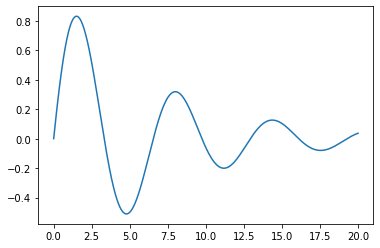

In [57]:
import numpy as np

t, y, z = [0], [0], [1]
alpha, h, n = .3, 0.01, 2000
for k in range(n-1):
    t.append(t[k] + h)
    y.append(y[k] + h*z[k])
    z.append(z[k] + h*(-alpha*z[k] - np.sin(y[k])))
plt.plot(t, y);

On observe des oscillations amorties.